# Ruwaida Rashid
#### (ADAPTED) How can one ascertain a fraudulent transaction which used a pin number or a chip by analysing the distance from the previous transaction, the ratio of the purchase price to the median price, and whether the transaction was made at a recurring retailer?
#### (ORIGINAL) Is it possible to determine the legitimacy of a transaction by analysing the inter-relationship between the distance from the last point of transaction, the ratio to median purchase price and if the transaction was made at a repeat retailer?

**Sub-Research Questions**
##### How is fraudulent transaction defined in the dataset?
##### Is there a correlation between the mode of transaction (online or offline) and the likelihood of a fraudulent transaction?
##### What can be said about the relationship between ratio to median purchase price and distance from home? 

**Rationale**
###### I have an interest in data privacy and areas of breaches, and with the limited statistical and python knowledge I believe this credit card fraud analysis allows me to gain the basic technical knowledge needed to further understand the techniques involved in further complex data analysis. Following the factors associated with a credit card transaction, I would like to understand if a trend exists between the distance from last location of transaction with the same credit card and a fraudulent transaction. Given the complexity of real life scenarios, I am also interested to know if higher median transaction suggests a greater chance of fraudulent transaction going through. In addition to which, if the point of transaction being a repeat retailer suggest a specific spending pattern that can contribute to higher chances of fraudulent transactions going through.

In [1]:
import pandas as pd
dataset = pd.read_csv("../data/raw/card_transdata.csv")
dataset.head(n=10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


### Data Wranggling

Ensuring data values are clean, null values and any data columns/rows irrelevant to the scope of analysis is removed. 

In [2]:
!pip install openpyxl

In [3]:
dataset = dataset[(dataset['distance_from_home'] < 15000) & (dataset['used_pin_number'] == 1) | (dataset['used_chip'] == 1) ]
midpoint = len(dataset) // 65
dataset = dataset.iloc[:midpoint]
dataset

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
10,14.263530,0.158758,1.136102,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
15188,3.244340,29.430981,0.640596,1.0,1.0,0.0,1.0,0.0
15191,37.358938,0.501143,0.318431,1.0,1.0,1.0,1.0,0.0
15198,12.248554,0.676475,0.220246,1.0,1.0,0.0,1.0,0.0
15199,2.225684,1.146965,0.556693,1.0,0.0,1.0,0.0,0.0


In [4]:
dataset.nunique(axis=0)

distance_from_home                6399
distance_from_last_transaction    6399
ratio_to_median_purchase_price    6399
repeat_retailer                      2
used_chip                            2
used_pin_number                      2
online_order                         2
fraud                                2
dtype: int64

In [5]:
data_filtered = dataset.dropna(subset=['distance_from_home'])
data_filtered = pd.DataFrame(data_filtered)
df = data_filtered.dropna(axis=1, how='any')
df.head(n=10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
10,14.263530,0.158758,1.136102,1.0,1.0,0.0,1.0,0.0
11,13.592368,0.240540,1.370330,1.0,1.0,0.0,1.0,0.0
12,765.282559,0.371562,0.551245,1.0,1.0,0.0,0.0,0.0
15,179.665148,0.120920,0.535640,1.0,1.0,1.0,1.0,0.0
20,78.623242,1.409245,1.838016,1.0,1.0,0.0,0.0,0.0
23,8.084177,0.138203,0.378661,1.0,0.0,1.0,0.0,0.0


**As part of a sub-inquiry of the dataset, the distance_from_home variable is grouped into equal ranges and their corresponding values for other variables are averaged to be stored into a new dataset which will help identify each of their distribution by distance from home. This helps consolidate and verify any inferences made from the larger dataset to answer the research question.**

In [6]:
bins = pd.cut(df["distance_from_last_transaction"], bins=10)
df_byrange = df.groupby(bins).mean()
df_byrange

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_last_transaction,,,,,,,,
"(-0.555, 55.639]",27.339428,3.288090,1.852299,0.878361,0.838817,0.244543,0.643625,0.051250
"(55.639, 111.278]",31.266607,72.862926,1.388347,0.916667,0.750000,0.312500,0.708333,0.125000
"(111.278, 166.916]",11.601360,131.249944,1.536804,0.777778,0.944444,0.111111,0.666667,0.166667
"(166.916, 222.555]",20.921306,178.917254,0.716837,0.666667,0.666667,0.333333,1.000000,0.000000
"(222.555, 278.193]",34.466190,254.220929,2.491827,0.750000,0.750000,0.250000,0.500000,0.000000
"(278.193, 333.831]",17.381681,280.463607,17.195546,1.000000,1.000000,1.000000,1.000000,0.000000
"(333.831, 389.47]",92.793097,351.648448,0.520301,1.000000,0.500000,0.500000,0.500000,0.500000
"(389.47, 445.108]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(445.108, 500.747]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_byrange.to_excel('Distance_From_Last_Transaction.xlsx', index=False)

In [8]:
stats_summary = df.describe().T
stats_summary
dataset_wc = stats_summary.dropna()
dataset_wc

,count,mean,std,min,25%,50%,75%,max
distance_from_home,6399.0,27.342262,64.810042,0.073739,3.775515,9.874434,25.794613,2146.055760
distance_from_last_transaction,6399.0,4.647758,16.540145,0.000930,0.308530,1.054112,3.413239,556.384989
ratio_to_median_purchase_price,6399.0,1.849564,2.896661,0.011373,0.485877,1.010195,2.076148,65.150879
repeat_retailer,6399.0,0.878262,0.327008,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,6399.0,0.838256,0.368245,0.000000,1.000000,1.000000,1.000000,1.000000
used_pin_number,6399.0,0.244882,0.430051,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,6399.0,0.644319,0.478756,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,6399.0,0.052196,0.222439,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
#Importing all packages needed for EDA
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

In [10]:
df.duplicated().sum()

0

In [11]:
if df.isnull().any().any():
    print("Dataset contains missing values")
else:
    print("Dataset does not contain missing values")

Dataset does not contain missing values


**Upon closer inspection of the averages, the distance metrics (distance from home and distance from last POS) are both assumed to be measured in km, following the universal metric system. Assumption based on lack of information provided for the variables from kaggle. Regardless of the two variations that it could be measured in, the distribution of the distance is not affected and does not contribute to the overall analysis of the dataset.**

### EDA & Analysis Pipeline

#### Correlation Heatmap: Determining the existence of linear relationship

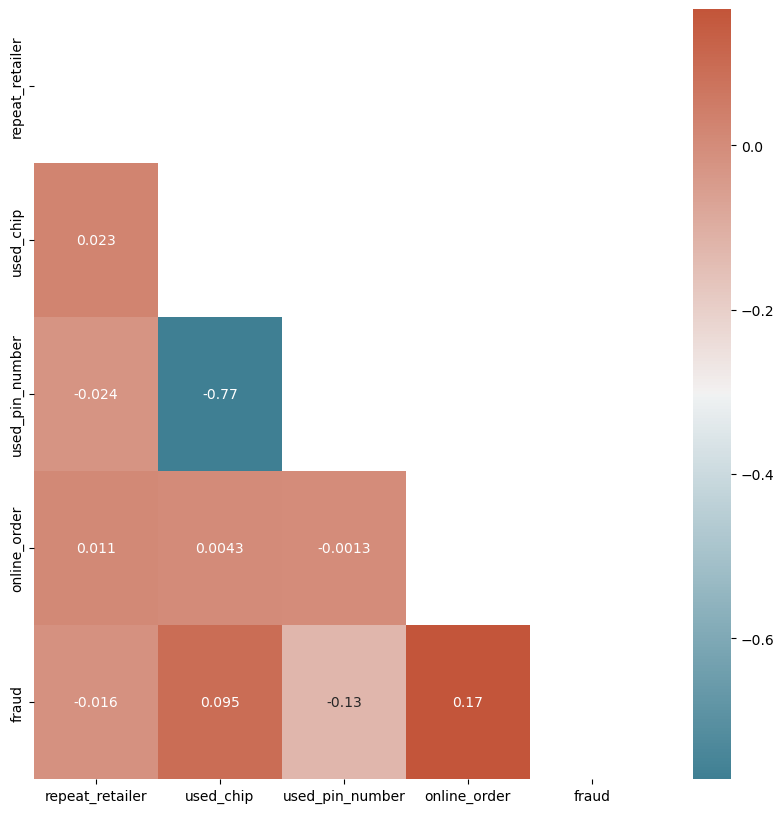

In [12]:
col_dropped = ['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']
df_bin = df.drop(col_dropped, axis = 1)
corr = df_bin.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
#Creates and changes the figure and axis size to accomodate all information
fig, ax = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(corr, xticklabels = corr.columns, 
            yticklabels=corr.columns, 
            annot=True,
            cmap = sns.diverging_palette(220,20,as_cmap=True),mask=mask)

**The strongest correlation between two variables seem to be -0.78 between pin and chip usage. This inference about the negative linear relationship between using pin or chip is unnecessary and negligible considering they are mutually exclusive. Next strongest correlation is between online ordder and fraud, 0.16 shows a relative posiive linear correlation. The likelihood of an online purchase being fraudulent is higher than when made at a POS. At -0.016, there exists no relationship between repeat retailer and fraud. Although one could say, the smallest of correlation that exists points to a negative relationship where one can say that among the points that seem to be linearly related, if the retailer was recurring, the chances of fraud was lower than when new. Otherwise, there seems to be no prominent correlations between any of the variables, with most of the correlation variables ranging closer to 0. One can evaluate that although there seems to be no strong linear correlation between any of the categorical variables, there could still exist other types of relationships where the nature of transaction can be determined based on the behaviour of trends associated with these variables. Lastly, it should be acknowledged that the heatmap can be analysed for any variables of the same type (variables of the binary type and numerical/continuous data type). Hence, a separate heatmap was create to visualise any existing linear relationship between the continuous variables.**

***Is there a relationship between online order and chip usage? Since the dataset focuses on all transactions made when verified with chip and pin numbers, can it be inferred that all fraudulent transactions occuring online have used chips? Unreliable method of verification?***

<AxesSubplot:>

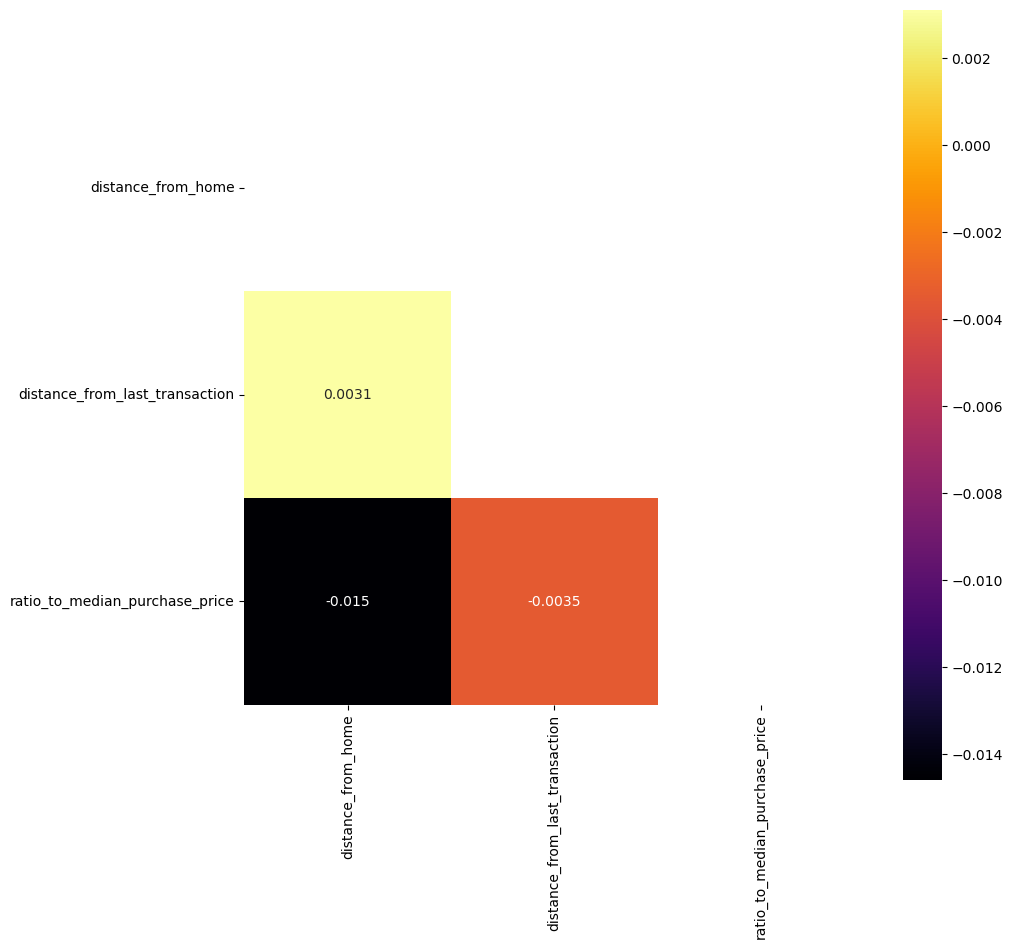

In [13]:
col_dropped = ['online_order','used_chip','used_pin_number','repeat_retailer','fraud']
df_bin = df.drop(col_dropped, axis=1)
corr = df_bin.corr()

# creating a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='inferno', annot=True, square=True, mask=mask, ax=ax)


**When looking at ratio to median purchase price there seems to be a weak, yet relatively linear (compared to distance from last transaction) relationship with distance from home. With a pearson's value of 0.015, one cannot confidently conclude there is a linear relaationship, enough to make inferences. Similarly, the linear relationship between distance from last transaction to ratio to median purchase price is significantly weaker at 0.0035. To analyse if there exists another type of relationship (alternative to linear), distribution charts can be plotted to see if there are any trends in the inter-relationship between these variables.**

***From the heatmap, there is no significant linear relationship between the condition of a recurring retailer and fraud, any that exist only points to the direction in which one affects the other and not the extent. Simiarly, the distance from last point of transaction and ratio to median purchase price do not seem to be linearly correlated to make any accurate conclusions of predictive behaviour. Although, there is a strong posiive relationship between online orders and fraud. If the order was made online, the likelihood of it being fraudulent is higher than when not.***

### Violin Plot

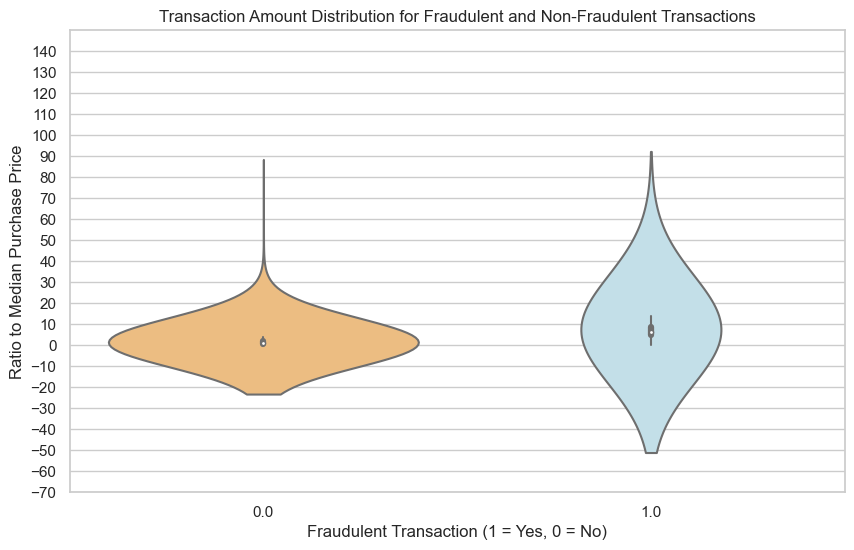

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.violinplot(x="fraud", 
               y="ratio_to_median_purchase_price", 
               data=df, 
               bw=5, palette="RdYlBu")
plt.ylim(-70, 150)
plt.yticks(np.arange(-70, 150, 10))
plt.title('Transaction Amount Distribution for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Fraudulent Transaction (1 = Yes, 0 = No)')
plt.ylabel('Ratio to Median Purchase Price')
plt.show()

**From the violin plot, there is a clear distribution influx when the ratio to median purchase price is within the range -20 to 20 for both fraudulent and non-fraudulent transactions. Although there are higher legitimate transactions (yellow) within lower ratios than fraudulent (blue), fraudulent transactions are distributed across a larger range of purchase ratio, from approximately -55 to 95 compared to the range of -25 to 90 for authentic transactions. One can infer that as the ratio to median purchase price increases, the likelihood of fraudulent transactions existing in that range increases than when the ratio is within a lower limit. It should be noted that a violin plot consists of kernel density plot on each side of the vertical axes, and the width of the kernel density plot is proportional to the density of the data at that point. 
In some cases, the density of the data at one end of the plot might be very small, resulting in a wide kernel density plot that extends below the horizontal axis. The negative values on the vertical axis could be attributed to such.**

***The distribution of fraudulent transactions are more spread out to higher purchase prices, concluding that higher ratio to median prices might not be a causation of fraud but more more fraud cases are observed at higher ratio to median purchase prices.***

### Relplot

/var/folders/f0/nh99jdt16ddg2nsr3t4x3s7r0000gn/T/ipykernel_13367/1659175278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['online_order'] = df_plot['online_order'].astype('category')


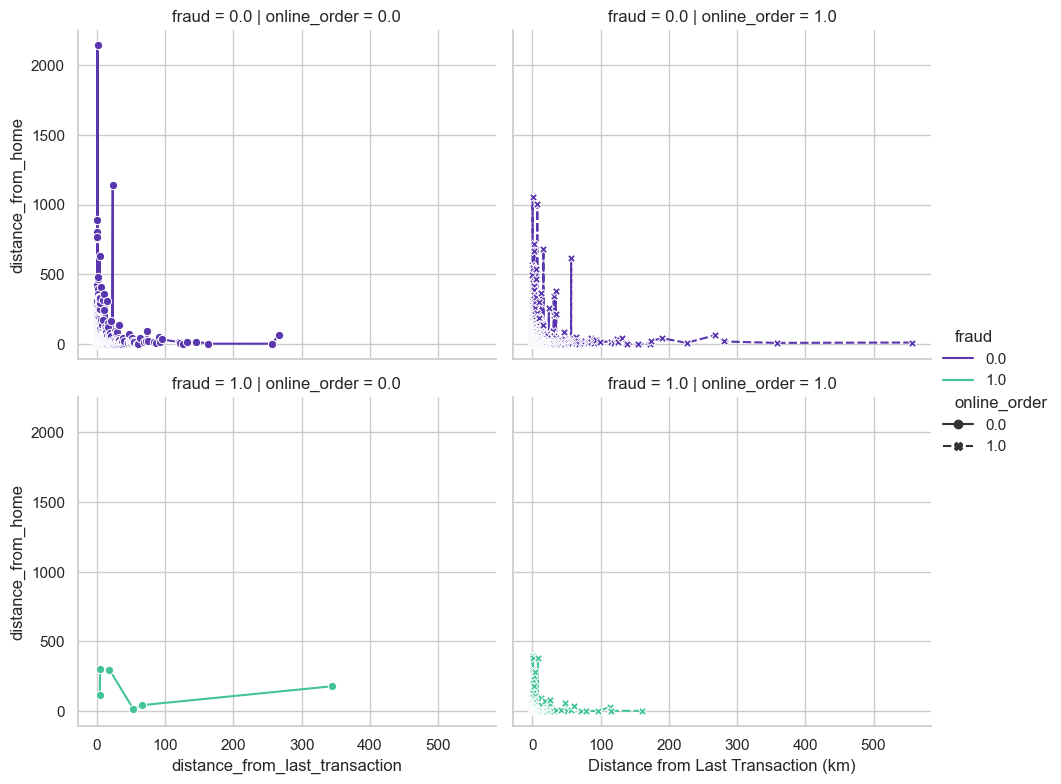

In [15]:
df_plot = df[['distance_from_home', 'distance_from_last_transaction', 'online_order', 'fraud']]

# Converting the online_order column to a categorical variable
df_plot['online_order'] = df_plot['online_order'].astype('category')

sns.relplot(x='distance_from_last_transaction', y='distance_from_home', hue='fraud', style='online_order',
            col='online_order', row='fraud', data=df_plot, kind='line', markers=True, height=4, aspect=1.2, palette=["#5936AF", "#43C39C"])

plt.xlabel('Distance from Last Transaction (km)')
plt.ylabel('Distance from Home (km)')

plt.show()

**When comparing distance from home with distance from last transaction by category of fraud (plot 1 VS plot 3), there is a higher density of transactions (as data points) spread across a wider range (more distributed). When all transactions made at the POS, there seems to be no correlation between the distance from home and distance from last transaction when discerning fraudulent transactions as all five points on the plot are scattered across the grid with no prevalent trend relating one to another. Although there is a larger set of data available in the range when it is an online transaction, there seems to be a linear homogenous correlation between the distance from last transaction and disance from homme. In conrast to these groups of online or offline traudulent transactions, legitimate transactions are spread out and highly distributed across distances.**

***With these differences, it can be concluded that fraud is more likely to take place with lower ranges of distance from home in both cases of online and offline transactions. With distance from last transaction, the higher liklelihood of fraud with closer distances are only consistent with online orders, as compared to point of sale transactions which have greater range of variability (although low data points),***

### KDE Plot

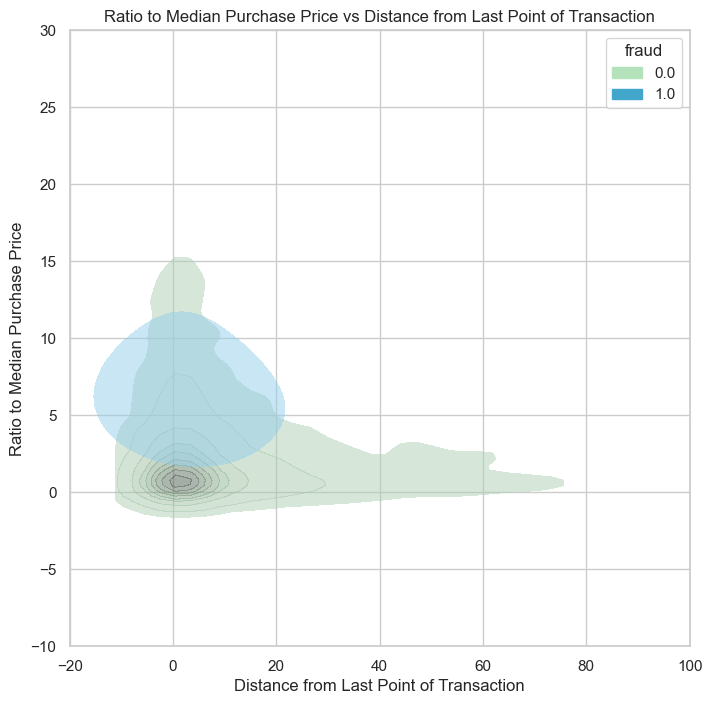

In [16]:
plt.figure(figsize=(8, 8))
sns.kdeplot(x='distance_from_last_transaction', 
            y='ratio_to_median_purchase_price', 
            hue='fraud', 
            data=df, 
            fill=True, alpha=0.5, palette='GnBu')
plt.title('Ratio to Median Purchase Price vs Distance from Last Point of Transaction')
plt.xlabel('Distance from Last Point of Transaction')
plt.xlim(-20,100)
plt.ylabel('Ratio to Median Purchase Price')
plt.ylim(-10,30)
plt.show()

**This is a 2-D KDE contour plot that displays the joint probability distribution of both distance from last point of transaction and ratio to median purchase price. The contour lines (for non-fraudulent transactions) show areas of equal density where darker areas indicate bigher density and lighter areas represent lower densitty. With the contour lines for fraud generally shifted upwards, relative to authentic transactions, it can be suggested that the likelihood of fraud transactions (blue) are higher when the ratio to median purchase price is greater and the distribution is more concentrated within lower distances from last point of transaction, supporting the inferencce derived from the relplot. As compared to legitimate transactions which are more dispersed across higher distance from last point of transaction and higher ratio to median purchase price. It should also be noted that there seems to be no contour lines for fraudulent transactions as there may not be enough data points within a specific contour line to generate meaningful contour lines.** 

***When ratio to median purchase price is higher, and the closer the current point of transaction is to the prior, the higher the likelihood of the transaction being classified as fraud.***


### Stacked Barplot

<Figure size 1000x1500 with 0 Axes>

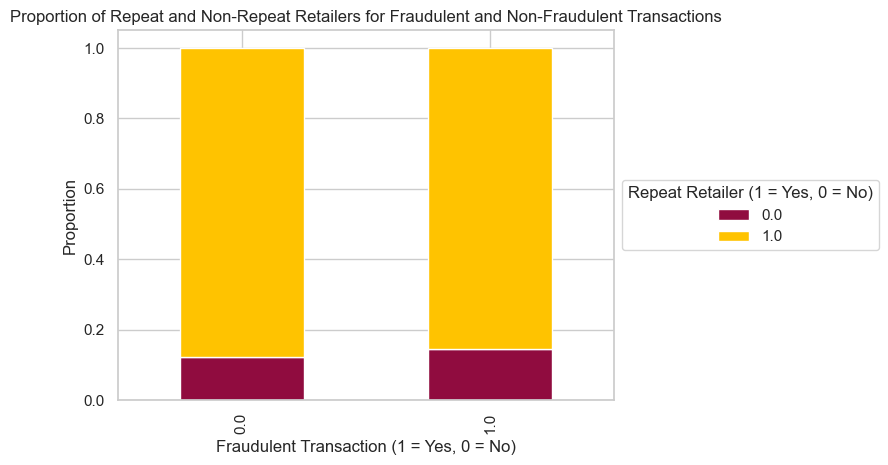

In [17]:
sns.set_style('whitegrid')

plt.figure(figsize=(10,15))
df_retail = df.groupby(['fraud', 'repeat_retailer']).size().unstack()
colors = ['#900C3F', '#FFC300']
df_retail = df_retail.div(df_retail.sum(axis=1), axis=0)
df_retail.plot(kind='bar', stacked=True, color=colors)
plt.title('Proportion of Repeat and Non-Repeat Retailers for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Fraudulent Transaction (1 = Yes, 0 = No)')
plt.ylabel('Proportion')
plt.legend(title='Repeat Retailer (1 = Yes, 0 = No)', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**The grouping of repeat retailer to the proportion of fraudulent transactions allow one to determine if there exists a significant portion of the variable which could point towards a potential predictive behaviour between the variables. It can be observed that there seems to be no significant proportion of tthe fraudulent or non-fraudulent transactions that would not classify as a repeat retailer. What is noteworthy though is that the sub-categories (fraud and authentic), there is almost a negligible difference in the proportion of retailers that are recurring. Ranging from approximately 85% - 90% of the proportion of fraudulent and authentic transctions are a repeat retailer. 

***Could be inferred there exists no relationship between the occurence of repeat retailer and the nature of transaction.***

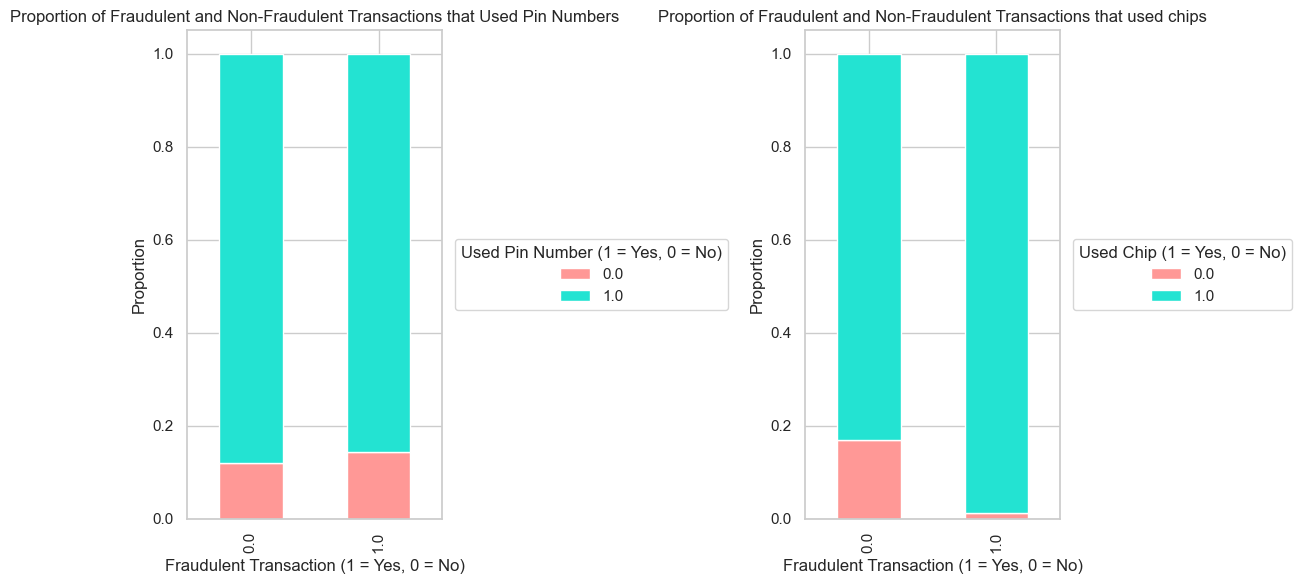

In [18]:
sns.set_style('whitegrid')

#CREATING SUBPLOTS

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

df_pin = df.groupby(['fraud', 'used_pin_number']).size().unstack()
colors = ['#ff9896', '#23E3D2']
df_pin = df_retail.div(df_retail.sum(axis=1), axis=0)
df_pin.plot(kind='bar', stacked=True, color=colors, ax=ax1)
ax1.set_title('Proportion of Fraudulent and Non-Fraudulent Transactions that Used Pin Numbers')
ax1.set_xlabel('Fraudulent Transaction (1 = Yes, 0 = No)')
ax1.set_ylabel('Proportion')
ax1.legend(title='Used Pin Number (1 = Yes, 0 = No)', loc='center left', bbox_to_anchor=(1.02, 0.5))

df_chip = df.groupby(['fraud', 'used_chip']).size().unstack()
colors = ['#ff9896', '#23E3D2']
df_chip = df_chip.div(df_chip.sum(axis=1), axis=0)
df_chip.plot(kind='bar', stacked=True, color=colors, ax=ax2)
ax2.set_title('Proportion of Fraudulent and Non-Fraudulent Transactions that used chips')
ax2.set_xlabel('Fraudulent Transaction (1 = Yes, 0 = No)')
ax2.set_ylabel('Proportion')
ax2.legend(title='Used Chip (1 = Yes, 0 = No)', loc='center left', bbox_to_anchor=(1.02, 0.5))

plt.tight_layout()
plt.show()


**Upon reflection on the efficiency of determining proportionality and inferring relationships, two more stacked barplots exploring the proportion of fraudulent and auhtentic transactions that are occurences of when a chip or a pin was used rebeals that although there seems to be an almost negligible difference between the usage of pin across fraud and non-fraudulent transactions, there seems to be relatively high proportion of fraudulent transactions that have used chips as compared to authentic. Conversely, the proportion of occurences where chip was not used is higher in authentic transaction than not.It should be noted that since the dataset has been wranggled to only analyse transactions that have used either chips or pin or both to authenticate transactions, this subset could be only representative of the creidt cards that are adapted to these methods of verification. It should also be noted that this plot would not take into consideration duplicate transaction. If a transaction were to use both chip and pin, both would be counted towards the dataset.**

***To base a relationship, one could claim that a high proportion of fraudulent transaction can be determoined by correlating it with a high use of chips.***

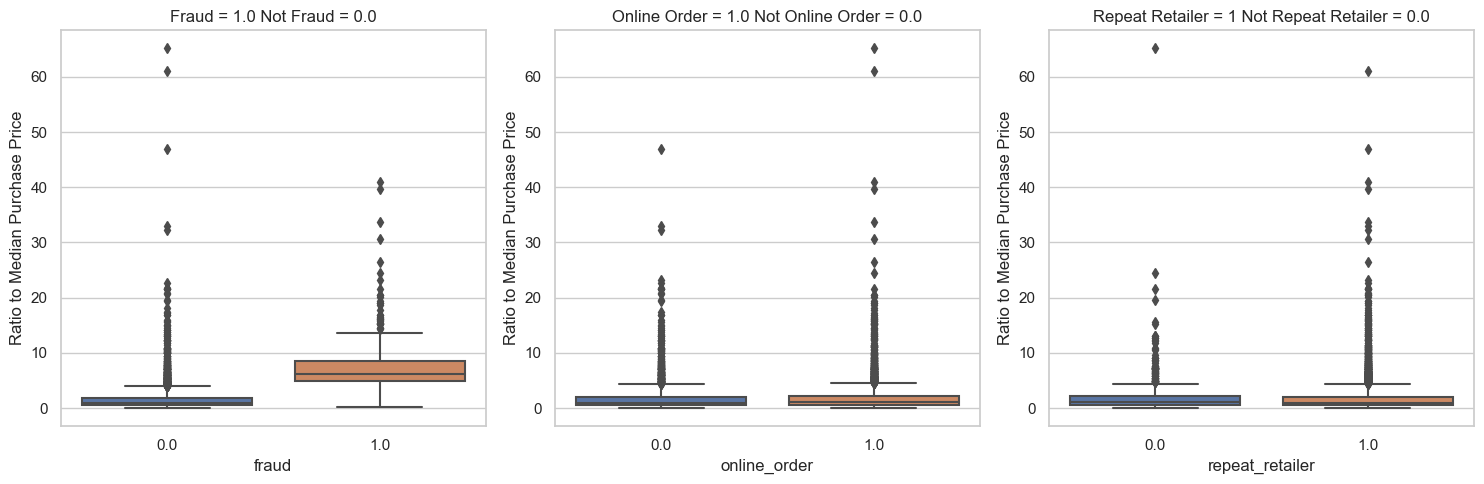

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
# creating boxplots for each categorical variable
sns.boxplot(x='fraud', y='ratio_to_median_purchase_price', data=df, ax=axs[0])
sns.boxplot(x='online_order', y='ratio_to_median_purchase_price', data=df, ax=axs[1])
sns.boxplot(x='repeat_retailer', y='ratio_to_median_purchase_price', data=df, ax=axs[2])

for ax in axs:
    ax.set_ylabel('Ratio to Median Purchase Price')

axs[0].set_title('Fraud = 1.0 Not Fraud = 0.0')
axs[1].set_title('Online Order = 1.0 Not Online Order = 0.0')
axs[2].set_title('Repeat Retailer = 1 Not Repeat Retailer = 0.0')

fig.tight_layout()
plt.show()


**To start, it needs to be acknowledged that there seems to be specific outliars within the dataset and the large distibution of the dataset past the maximum does not allow for the boxplot to effectively communiate the information needed. Between online order, repeat retailer and ratio to median purchase price, the statistical measures in a box and whisker (mean, median, interquartile rannge) are relatively identifcal, regardless of the scale. However, it is observed that the average distribution of fraud is higher at greater ratio to media purchase price, at approximately 5 than non fraudulent transactions.**

***Separate from the distance from last transaction as a variable constraint in the KDE plot, the first sub-plot comparing the ratio to median purchase price and fraud demonstrates a relative relationnship between higher ratio to median purchase prices and higher rates of fraud.***

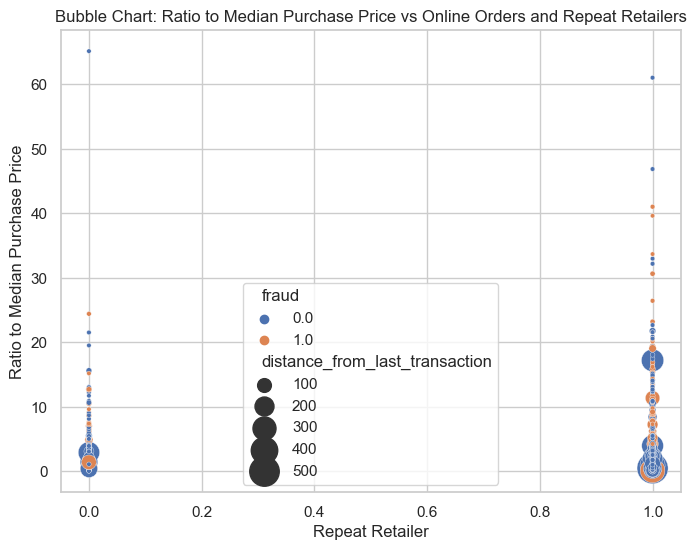

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='repeat_retailer', y='ratio_to_median_purchase_price', hue='fraud', size='distance_from_last_transaction', sizes=(10, 500), data=df)

plt.xlabel('Repeat Retailer')
plt.ylabel('Ratio to Median Purchase Price')
plt.title('Bubble Chart: Ratio to Median Purchase Price vs Online Orders and Repeat Retailers')

plt.show()


**Upon seeing that there were no relationship between the occurennces of repeat retailers and the likelihood of fraud, as well as the positive relationship betweenn ratio to median purchase price and fraud, there could an inter-relationship between the ratio to median purchase price with repeat retailer. This bubble chart, although inconnclusive visually with overplotting, they are filtered by distannce from last transaction and fraudd. As seen, there are larger bubbles relatively concentrated at the lower portion of the chart for both conditions of repeat retailer one can conclude that with similar distribution of fraudulent transactions for both of them there seems to be no significiant relationship between repeat retailer and fraud. This confirms the earlier conclusion. However, with the distribiution range of ratio to median purchase price higher for repeat retailers than when not, one can loosely infer that as the retailer is repeated the transaction amount (variable to the median) is higher.**

***It can be loosely concluded that there seems to be a positive relationship between repeat retailers and ratio to median purchase price. If a retailer were recurring, the likelihood of ratio to median purchase price, indicative of amount spent, is higher.****

**These are the following inferences that one can make about some of the relationships between the variables**
- Ratio to median purchase price trends in a similar fashion to distace from home and ddistance from last transaction.
- Due to 

### Using df_byrange to understand conclusion

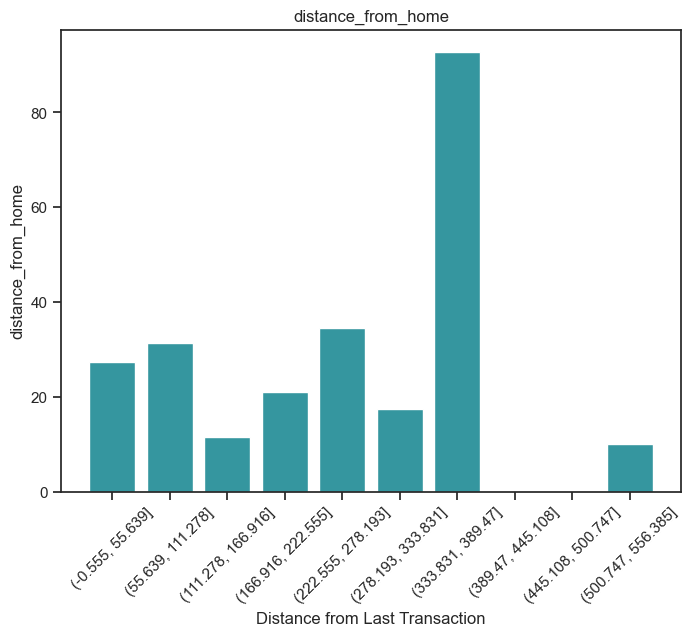

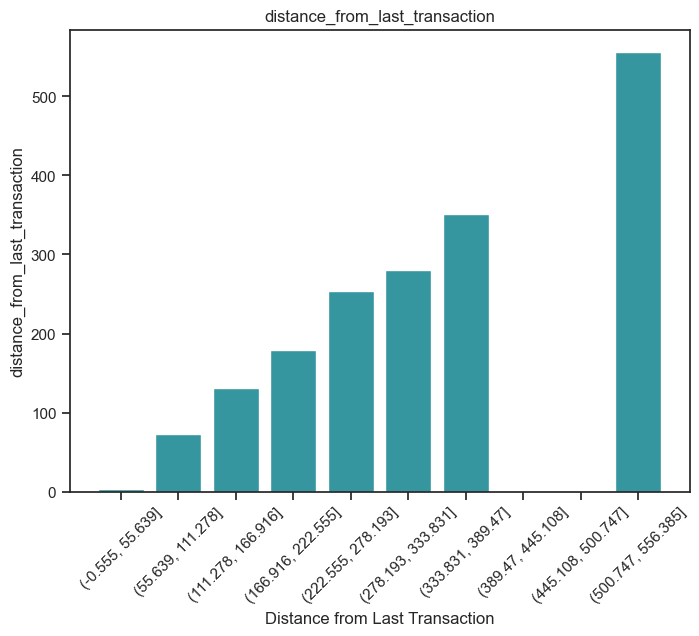

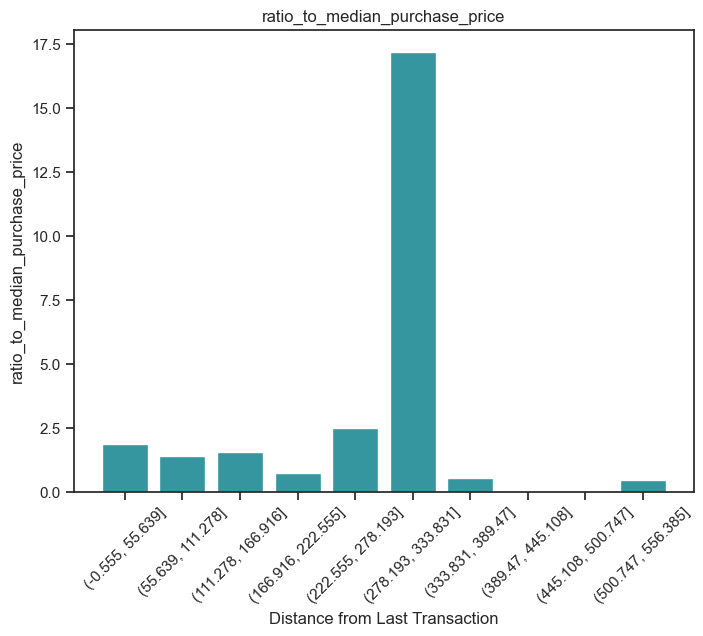

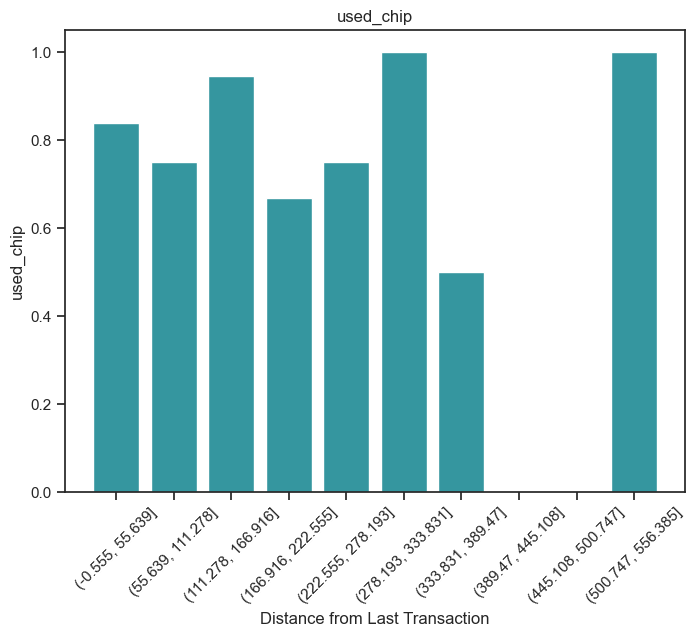

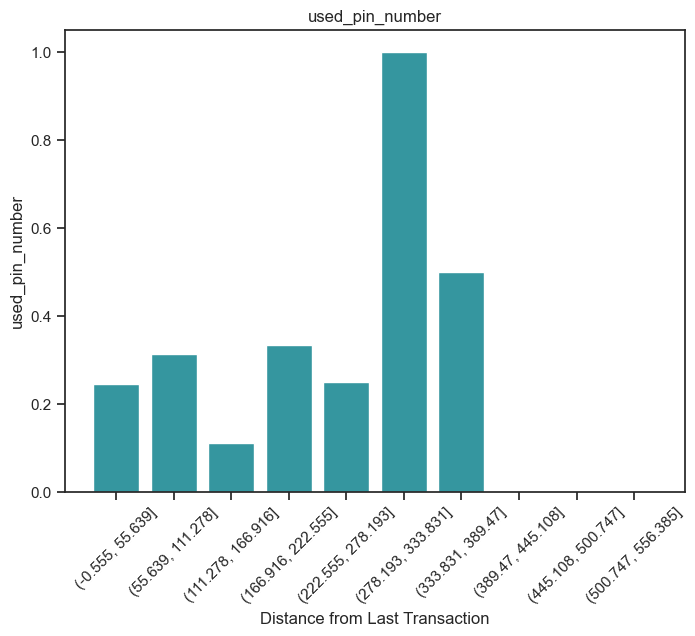

In [27]:
x_labels = df_byrange.index.astype(str)

for col in df_byrange.columns:
    if col == 'fraud' or col == 'online_order' or col == 'repeat_retailer':
        continue
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(x_labels, df_byrange[col], color = '#35969F')
    ax.set_title(col)
    ax.set_xlabel('Distance from Last Transaction')
    ax.set_ylabel(col)
    plt.xticks(rotation=45)
    plt.show()


In [28]:
fraud_counts = []

for i, row in df_byrange.iterrows():
    lower, upper = row.name.left, row.name.right
    fraud_count = df.loc[(df['distance_from_home'] > lower) & (df['distance_from_home'] <= upper) & (df['fraud'] == 1), 'fraud'].count()
    fraud_counts.append(fraud_count)

fraud_counts

[296, 20, 6, 2, 3, 4, 2, 1, 0, 0]

**We can see that there is a larger count of fraud in the closer ranges of distances from last transaction and with the stark differences in the count in the following ranges, one can confidently conclude that with closer the distance to the last point of transaction, the greater the likelihood of fraud.**

### Conclusion

***The following can be inferred to answer the research question of how one can ascertain a fraudulent transaction which used a pin number or a chip by analysing the distance from the previous transaction, the ratio of the purchase price to the median price, and whether the transaction was made at a recurring retailer?***

***The distribution of fraudulent transactions are more spread out to higher purchase prices, concluding that higher ratio to median prices might not be a causation of fraud but more more fraud cases are observed at higher ratio to median purchase prices. Higher ratio to median purchase price could be associated with fraud.***

***As seen from the stacked barplot, there exists no relationship between the occurence of repeat retailer and the nature of a transaction.***

***Last but not least, as the distance from last transaction increases the likelihood of fraud subsequently decreases. When the distance from last point of transaction is closer to the current, tt